In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
d = pd.read_csv('/content/drive/MyDrive/student/student-por.csv', sep=';')
len(d)

649

In [6]:
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1', 'G2', 'G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,1


In [7]:
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,pass,sex_F,sex_M,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


In [8]:
d = d.sample(frac=1)
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


In [36]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
t = t.fit(d_train_att, d_train_pass)

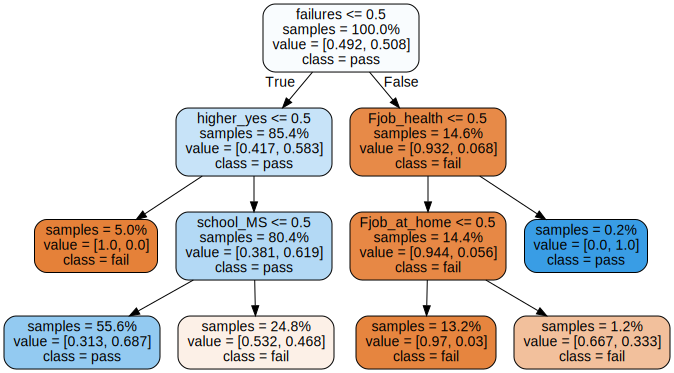

In [38]:
import graphviz
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=["fail", "pass"],
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [39]:
t.score(d_test_att, d_test_pass)

0.7449664429530202

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.07)


In [41]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.64 (+/- 0.03)
Max depth: 2, Accuracy: 0.69 (+/- 0.03)
Max depth: 3, Accuracy: 0.70 (+/- 0.07)
Max depth: 4, Accuracy: 0.69 (+/- 0.09)
Max depth: 5, Accuracy: 0.69 (+/- 0.08)
Max depth: 6, Accuracy: 0.68 (+/- 0.07)
Max depth: 7, Accuracy: 0.68 (+/- 0.08)
Max depth: 8, Accuracy: 0.65 (+/- 0.07)
Max depth: 9, Accuracy: 0.65 (+/- 0.09)
Max depth: 10, Accuracy: 0.66 (+/- 0.07)
Max depth: 11, Accuracy: 0.66 (+/- 0.09)
Max depth: 12, Accuracy: 0.64 (+/- 0.09)
Max depth: 13, Accuracy: 0.63 (+/- 0.06)
Max depth: 14, Accuracy: 0.63 (+/- 0.08)
Max depth: 15, Accuracy: 0.64 (+/- 0.10)
Max depth: 16, Accuracy: 0.64 (+/- 0.10)
Max depth: 17, Accuracy: 0.62 (+/- 0.08)
Max depth: 18, Accuracy: 0.63 (+/- 0.09)
Max depth: 19, Accuracy: 0.64 (+/- 0.07)


In [27]:
depth_acc = np.empty((19, 3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1

depth_acc

array([[ 1.        ,  0.63793679,  0.03080503],
       [ 2.        ,  0.68570066,  0.03455195],
       [ 3.        ,  0.69497913,  0.0735583 ],
       [ 4.        ,  0.69341682,  0.08722992],
       [ 5.        ,  0.68878951,  0.07944048],
       [ 6.        ,  0.67955874,  0.07493652],
       [ 7.        ,  0.67035182,  0.08987205],
       [ 8.        ,  0.65644603,  0.07164152],
       [ 9.        ,  0.65799642,  0.07661724],
       [10.        ,  0.65797257,  0.05963184],
       [11.        ,  0.64716756,  0.0548975 ],
       [12.        ,  0.64257603,  0.08549741],
       [13.        ,  0.64723912,  0.07025703],
       [14.        ,  0.63490757,  0.07039627],
       [15.        ,  0.64104949,  0.07590749],
       [16.        ,  0.63948718,  0.08266438],
       [17.        ,  0.63644603,  0.08659552],
       [18.        ,  0.63181872,  0.07861473],
       [19.        ,  0.63955874,  0.08897686]])

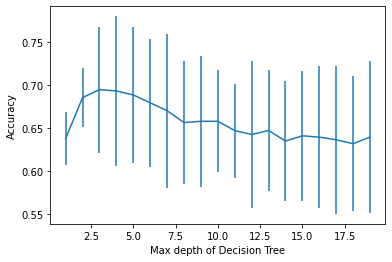

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.xlabel('Max depth of Decision Tree')
plt.ylabel('Accuracy')
plt.show()

**Optional: Can you improve the accuracy by adjusting the number of input features and depths? (2pts)**

After performing cross validation, varying the hyperparameter max depth, I determined that the best max depth value is 3 because it correlates with the best possible accuracy (70%).

Confusion matrix, without normalization
[[52 23]
 [15 59]]


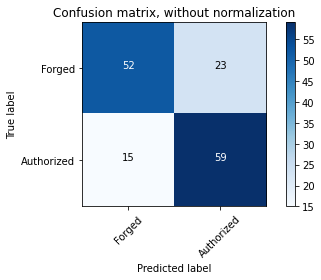

In [45]:
#Evaluation of Model - Confusion Matrix Plot
import itertools 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
t = t.fit(d_train_att, d_train_pass)
y_pred = t.predict(d_test_att)
cnf_matrix = confusion_matrix(d_test_pass, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Forged','Authorized'],
                      title='Confusion matrix, without normalization')

**Create a confusion matrix and explain what you see in the matrix in terms of Tru Positive, True Negative, False Positive, and False Negative, by adding one text section (5pts)**

Those values represent accuracy (or how well the model is performing). 
True Positive are the values that are true, and the model predicted correctly (bottom right quadrant).
True Negative are the values that are false, and the model predicted correctly (top left). 
False Positive are the values that are false, but were classified as true, hence, predicted incorrectly (top right quadrant).
False Negative are the values that are true, but were classified as false, hence, predicted incorrectly (bottom left quadrant).
